
Aufgabe 1
1.	Importieren Sie die erforderlichen Bibliotheken
2. Welche Variablen sind im Datensatz verfügbar?
3. Spaltennamen übersetzen
4. Exploren Sie die Daten
5. Cleaning Sie die Daten
6. Füllen Sie den Nan-Wert mit dem mean
7. Entfernen doppelter Werte
8. Welche Variablen sind numerisch?
9. Welche Variablen sind kategorisch?
10. ÜBERPRÜFEN Sie die value_counts für jeder Variablen
11. Visualisierung der Daten:
• Zeigen Sie ein Diagramm für alle Variablen an
12. Erkennung und Entfernung von Ausreißern (Outliers)
13. Wer ist der ältere Kontakt?
15. Überprüfen Sie die Normalitätsverteilung
16. Überprüfen Sie die Korrelation mit der Bibliothek Seaborn und mit der Bibliothek Klib
17. Splitting des Modells
18. Trainieren und testen Sie den Satz mit der Test_size = 0,3
19. Führen Sie das Modell mit sklearn aus: lineare Regression, knn-Regression
20. Plot the actual value und the predicted value
21. Determinate the mean square errors and r square for each model

AUFGABE 2
1. Überprüfen Sie die Stationarität für jede Variable mit ADF und KPSS
2. Führen Sie das lineare Regressionsmodell aus



-

TASK 1

1. Import the required libraries.
2. Identify the available variables in the dataset.
3. Translate column names.
4. Explore the data.
5. Clean the data.
6. Fill NaN values with the mean.
7. Remove duplicate values.
8. Identify numerical variables.
9. Identify categorical variables.
10. CHECK the value_counts for each variable.
11. Visualize the data:
   - Display a chart for all variables.
12. Detect and remove outliers.
13. Determine the older contact.
15. Check for normality distribution.
16. Check the correlation using Seaborn and Klib libraries.
17. Split the dataset.
18. Train and test the set with Test_size = 0.3.
19. Execute the model using sklearn: linear regression, knn-regression.
20. Plot the actual value and the predicted value.
21. Determine the mean square errors and r-square for each model.

TASK 2

1. Check stationarity for each variable using ADF and KPSS.
2. Execute the linear regression model.


-






1. Import the required libraries.

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score



2. Identify the available variables in the dataset.

In [2]:
file_path = 'Germany.xlsx'
df = pd.read_excel(file_path, sheet_name='Tabelle1', skiprows=1)
variables_list = list(df.columns)

#Show Variables
print(variables_list)


['Series Name', 'Inflation, consumer prices (annual %)', 'Market capitalization of listed domestic companies (% of GDP)', 'Real effective exchange rate index (2010 = 100)', 'GDP growth (annual %)', 'Gross fixed capital formation (% of GDP)', 'Personal remittances, paid (current US$)', 'Foreign direct investment, net outflows (BoP, current US$)']


3- Spaltennamen übersetzen

In [3]:

# German translation dictionary
translate_dic = {
    'Series Name': 'Name der Serie',
    'Inflation, consumer prices (annual %)': 'Inflation, Verbraucherpreise (jährlich %)',
    'Market capitalization of listed domestic companies (% of GDP)': 'Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)',
    'Real effective exchange rate index (2010 = 100)': 'Realer effektiver Wechselkursindex (2010 = 100)',
    'GDP growth (annual %)': 'Wirtschaftswachstum (jährlich %)',
    'Gross fixed capital formation (% of GDP)': 'Bruttoanlageinvestitionen (% des BIP)',
    'Personal remittances, paid (current US$)': 'Persönliche Überweisungen (aktuelle US$)',
    'Foreign direct investment, net outflows (BoP, current US$)': 'Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)'
}

# Rename the columns
df.rename(columns=translate_dic, inplace=True)

# Display the updated DataFrame
df.head()


,Name der Serie,"Inflation, Verbraucherpreise (jährlich %)",Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP),Realer effektiver Wechselkursindex (2010 = 100),Wirtschaftswachstum (jährlich %),Bruttoanlageinvestitionen (% des BIP),Persönliche Überweisungen (aktuelle US$),"Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)"
0,1997,1.939369,37.307261,110.190012,1.792161,22.650639,9473507979.141439,49529035003.912102
1,1998,0.911185,48.872578,110.367325,2.013933,22.798225,9108082670.55018,97004412840.271698
2,1999,0.585433,65.248414,106.891468,1.887261,23.038680,10088645451.1654,139402049693.11499
3,2000,1.440268,65.208158,99.680307,2.912503,23.114329,8662856855.468519,98172100562.192001
4,2001,1.983857,55.080363,99.664381,1.681468,21.778195,9184539370.74823,70242086898.7686


4. Explore the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Name der Serie                                                            25 non-null     int64  
 1   Inflation, Verbraucherpreise (jährlich %)                                 25 non-null     float64
 2   Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)  25 non-null     object 
 3   Realer effektiver Wechselkursindex (2010 = 100)                           25 non-null     float64
 4   Wirtschaftswachstum (jährlich %)                                          25 non-null     float64
 5   Bruttoanlageinvestitionen (% des BIP)                                     25 non-null     float64
 6   Persönliche Überweisungen (aktuelle US$)                             

In [5]:
df.describe()

,Name der Serie,"Inflation, Verbraucherpreise (jährlich %)",Realer effektiver Wechselkursindex (2010 = 100),Wirtschaftswachstum (jährlich %),Bruttoanlageinvestitionen (% des BIP)
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,2009.000000,1.451473,101.080698,1.255694,20.710421
std,7.359801,0.706022,5.317624,2.291136,1.256366
min,1997.000000,0.312738,92.539195,-5.693836,19.076699
25%,2003.000000,0.911185,97.023625,0.731707,19.901471
50%,2009.000000,1.504721,99.680307,1.681468,20.302966
75%,2015.000000,1.939369,105.881615,2.680231,21.778195
max,2021.000000,3.142970,110.367325,4.179882,23.114329


5. Cleaning Sie die Daten
6. Füllen Sie den Nan-Wert mit dem mean

In [6]:
df['Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)'] = pd.to_numeric(df['Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)'], errors='coerce')
df['Persönliche Überweisungen (aktuelle US$)'] = pd.to_numeric(df['Persönliche Überweisungen (aktuelle US$)'], errors='coerce')
df['Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)'] = pd.to_numeric(df['Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)'], errors='coerce')

# Theses lines are converting a specified column in the DataFrame (for exemple 'Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)') to numeric values. 
# If there are any errors during the conversion, they will be replaced with NaN.




# Fill NaN values with the mean for each column
df['Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)'].fillna(df['Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)'].mean(), inplace=True)
df['Persönliche Überweisungen (aktuelle US$)'].fillna(df['Persönliche Überweisungen (aktuelle US$)'].mean(), inplace=True)
df['Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)'].fillna(df['Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)'].mean(), inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 8 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Name der Serie                                                            25 non-null     int64  
 1   Inflation, Verbraucherpreise (jährlich %)                                 25 non-null     float64
 2   Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)  25 non-null     float64
 3   Realer effektiver Wechselkursindex (2010 = 100)                           25 non-null     float64
 4   Wirtschaftswachstum (jährlich %)                                          25 non-null     float64
 5   Bruttoanlageinvestitionen (% des BIP)                                     25 non-null     float64
 6   Persönliche Überweisungen (aktuelle US$)                             

In [8]:
df.describe()

,Name der Serie,"Inflation, Verbraucherpreise (jährlich %)",Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP),Realer effektiver Wechselkursindex (2010 = 100),Wirtschaftswachstum (jährlich %),Bruttoanlageinvestitionen (% des BIP),Persönliche Überweisungen (aktuelle US$),"Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)"
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,2.500000e+01,2.500000e+01
mean,2009.000000,1.451473,47.827880,101.080698,1.255694,20.710421,1.450647e+10,1.053879e+11
std,7.359801,0.706022,10.142027,5.317624,2.291136,1.256366,3.843815e+09,4.407379e+10
min,1997.000000,0.312738,29.652906,92.539195,-5.693836,19.076699,8.662857e+09,9.069678e+09
25%,2003.000000,0.911185,42.139339,97.023625,0.731707,19.901471,1.156629e+10,9.329332e+10
50%,2009.000000,1.504721,47.827880,99.680307,1.681468,20.302966,1.468211e+10,1.053879e+11
75%,2015.000000,1.939369,54.683534,105.881615,2.680231,21.778195,1.777272e+10,1.394020e+11
max,2021.000000,3.142970,65.248414,110.367325,4.179882,23.114329,2.169912e+10,1.959217e+11


In [9]:
df.head(28)

,Name der Serie,"Inflation, Verbraucherpreise (jährlich %)",Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP),Realer effektiver Wechselkursindex (2010 = 100),Wirtschaftswachstum (jährlich %),Bruttoanlageinvestitionen (% des BIP),Persönliche Überweisungen (aktuelle US$),"Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)"
0,1997,1.939369,37.307261,110.190012,1.792161,22.650639,9.473508e+09,4.952904e+10
1,1998,0.911185,48.872578,110.367325,2.013933,22.798225,9.108083e+09,9.700441e+10
2,1999,0.585433,65.248414,106.891468,1.887261,23.038680,1.008865e+10,1.394020e+11
3,2000,1.440268,65.208158,99.680307,2.912503,23.114329,8.662857e+09,9.817210e+10
4,2001,1.983857,55.080363,99.664381,1.681468,21.778195,9.184539e+09,7.024209e+10
5,2002,1.420806,33.005468,100.721455,-0.197974,20.121786,1.012652e+10,1.720272e+10
6,2003,1.034228,43.132748,106.129382,-0.700117,19.523325,1.156629e+10,3.930084e+10
7,2004,1.665733,42.443731,107.648542,1.175088,19.091014,1.260740e+10,9.069678e+09
8,2005,1.546910,42.226681,105.217652,0.731707,19.076699,1.270566e+10,8.892534e+10
9,2006,1.577428,54.683534,104.255132,3.816442,19.802900,1.270504e+10,1.479753e+11


7. Entfernen doppelter Werte

In [10]:
df_duplicade = df.drop_duplicates(subset='Name der Serie', keep='first')

#in this data set we can't removeduplicates from other columns, so we we are checking for duplicates on the year (Name der Serie) column. 


8. Identify numerical variables.
9. Identify categorical variables.

In [11]:
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns
categorical_vars = df.select_dtypes(include=['object']).columns

print("Numerical Variables:")
print(numerical_vars)

print("\nCategorical Variables:")
print(categorical_vars)


Numerical Variables:
Index(['Name der Serie', 'Inflation, Verbraucherpreise (jährlich %)',
       'Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)',
       'Realer effektiver Wechselkursindex (2010 = 100)',
       'Wirtschaftswachstum (jährlich %)',
       'Bruttoanlageinvestitionen (% des BIP)',
       'Persönliche Überweisungen (aktuelle US$)',
       'Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)'],
      dtype='object')

Categorical Variables:
Index([], dtype='object')


10. ÜBERPRÜFEN Sie die value_counts für jeder Variablen

In [12]:
# counting the number of values 
for column in df.columns:
    print(f"\nValue Counts for {column}:")
    print(df[column].value_counts())
#counting the number of  


for column in df.columns:
    print(f"\nNumber of Values for {column}: {df[column].count()}")



Value Counts for Name der Serie:
Name der Serie
1997    1
2010    1
2020    1
2019    1
2018    1
2017    1
2016    1
2015    1
2014    1
2013    1
2012    1
2011    1
2009    1
1998    1
2008    1
2007    1
2006    1
2005    1
2004    1
2003    1
2002    1
2001    1
2000    1
1999    1
2021    1
Name: count, dtype: int64

Value Counts for Inflation, Verbraucherpreise (jährlich %):
Inflation, Verbraucherpreise (jährlich %)
1.939369    1
1.103809    1
0.506690    1
1.445667    1
1.732168    1
1.509497    1
0.491749    1
0.514421    1
0.906798    1
1.504721    1
2.008491    1
2.075175    1
0.312738    1
0.911185    1
2.628382    1
2.298342    1
1.577428    1
1.546910    1
1.665733    1
1.034228    1
1.420806    1
1.983857    1
1.440268    1
0.585433    1
3.142970    1
Name: count, dtype: int64

Value Counts for Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP):
Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)
37.307261    1
42.054669    1
5

11. Visualisierung der Daten:
• Zeigen Sie ein Diagramm für alle Variablen an

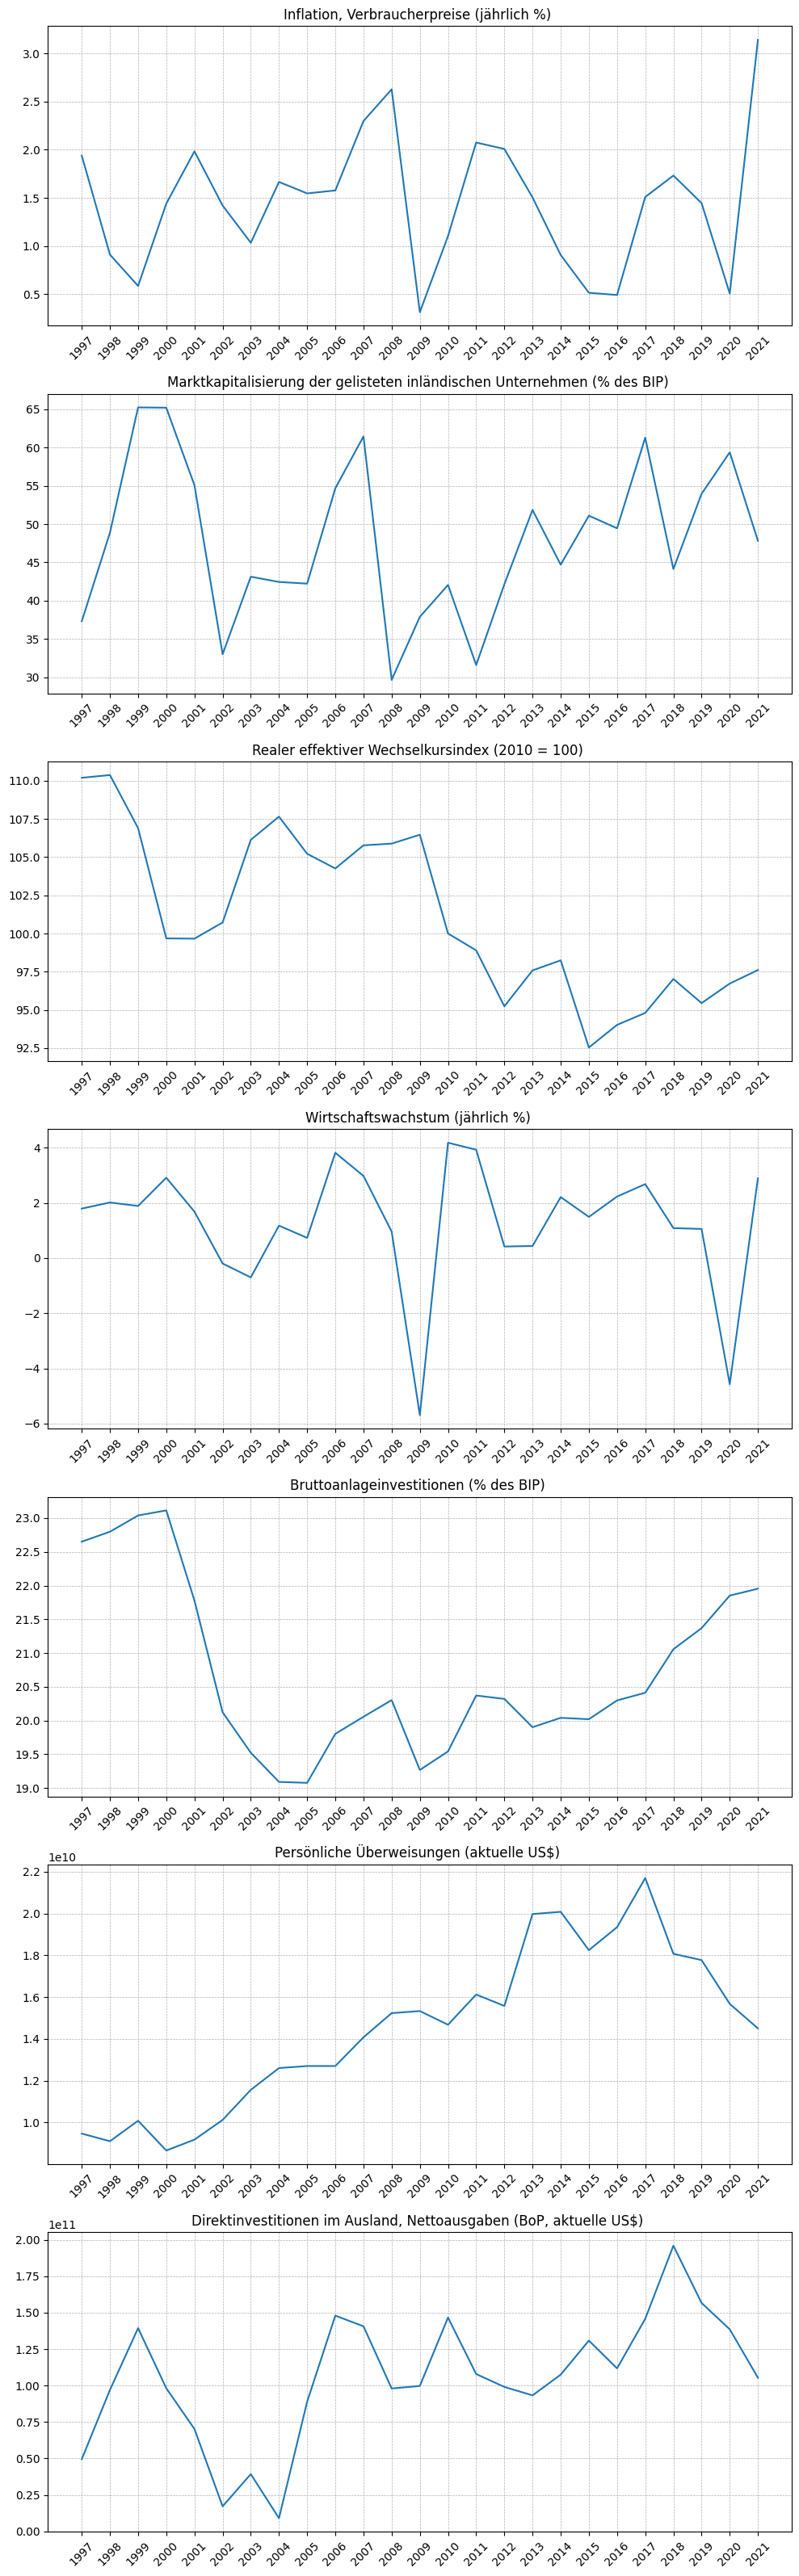

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4 * len(df.columns)))

# Extract unique years from the 'Name der Serie' column
all_years = df['Name der Serie'].unique()

# Iterate through each column (excluding 'Name der Serie' and assuming other columns are numeric)
for i, column in enumerate(df.columns[1:]):
    plt.subplot(len(df.columns)-1, 1, i+1)
    
    # Ensure that all years are present in the data, even if some have missing values
    sns.lineplot(x='Name der Serie', y=column, data=df, sort=False)
    
    plt.title(f'{column} ')
    plt.xlabel('Year')
    plt.ylabel(column)
    
    # Set x-axis ticks to all years
    plt.xticks(ticks=all_years, labels=all_years, rotation=45)
    
    # Add major grid lines
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)
    
    # Remove axis labels
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()


12. Erkennung und Entfernung von Ausreißern (Outliers)

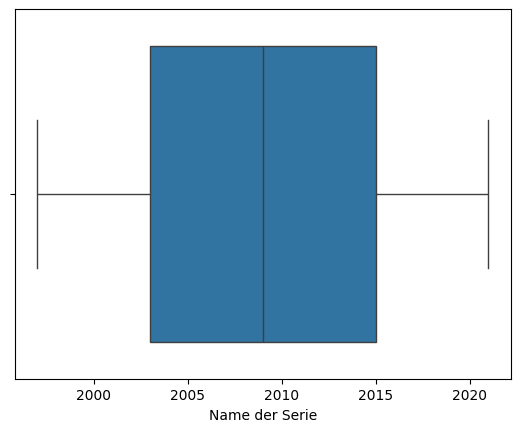

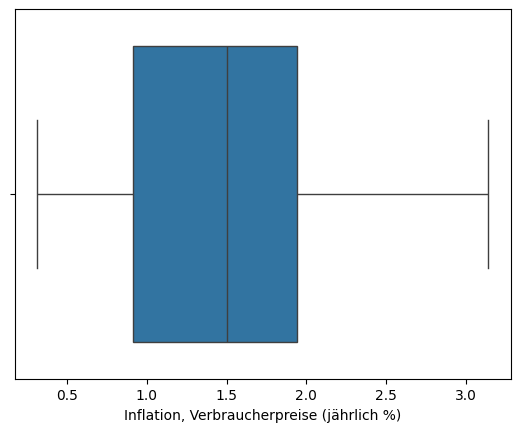

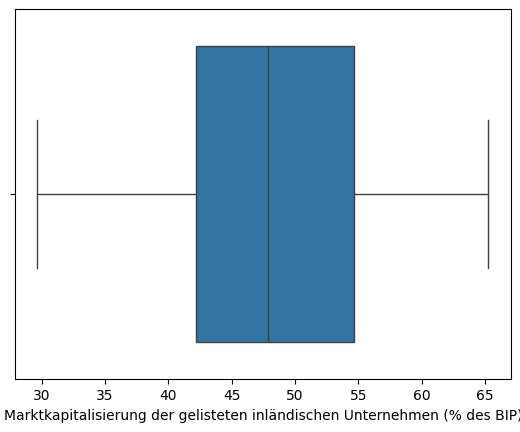

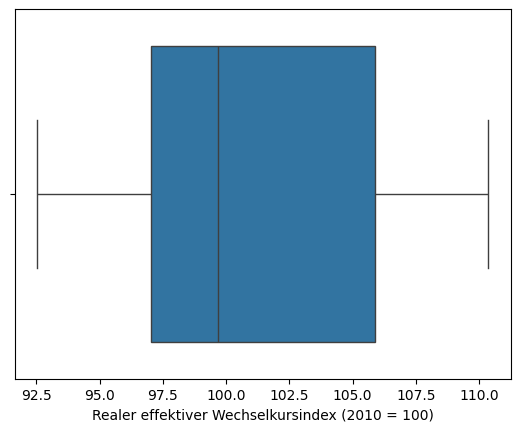

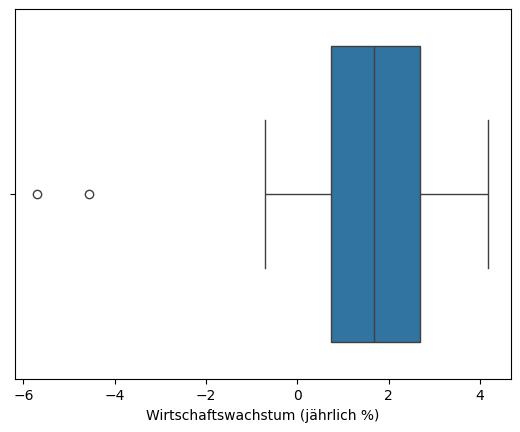

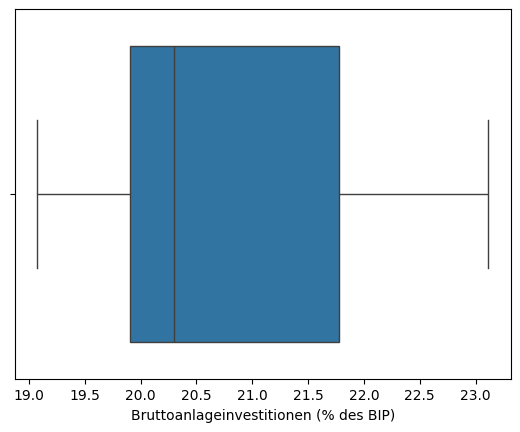

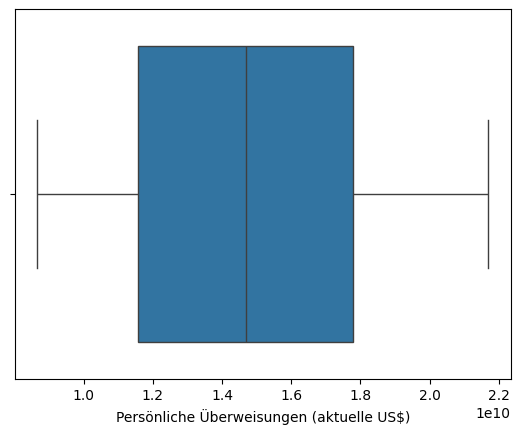

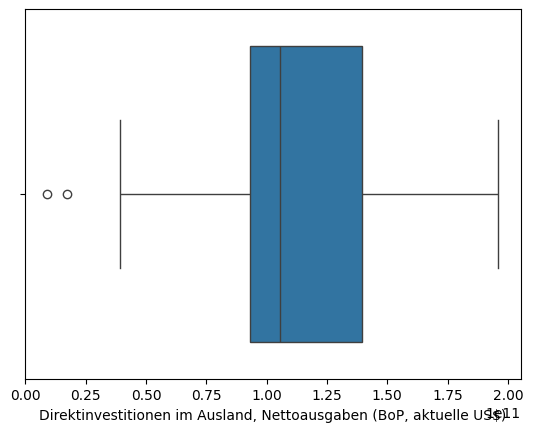

In [19]:
for col in df:
        sns.boxplot(x=col, data=df)
        plt.show()

13. Wer ist der ältere Kontakt?  # We have no "Kontakt" in this Dataset
15. Check for normality distribution.

Shapiro-Wilk Test for Name der Serie: Statistic=0.9586, p-value=0.3866
Name der Serie appears to be normally distributed (fail to reject H0)

Shapiro-Wilk Test for Inflation, Verbraucherpreise (jährlich %): Statistic=0.9656, p-value=0.5374
Inflation, Verbraucherpreise (jährlich %) appears to be normally distributed (fail to reject H0)

Shapiro-Wilk Test for Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP): Statistic=0.9691, p-value=0.6212
Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP) appears to be normally distributed (fail to reject H0)

Shapiro-Wilk Test for Realer effektiver Wechselkursindex (2010 = 100): Statistic=0.9365, p-value=0.1227
Realer effektiver Wechselkursindex (2010 = 100) appears to be normally distributed (fail to reject H0)

Shapiro-Wilk Test for Wirtschaftswachstum (jährlich %): Statistic=0.8321, p-value=0.0008
Wirtschaftswachstum (jährlich %) does not appear to be normally distributed (reject H0)

Shapiro-Wilk Test 

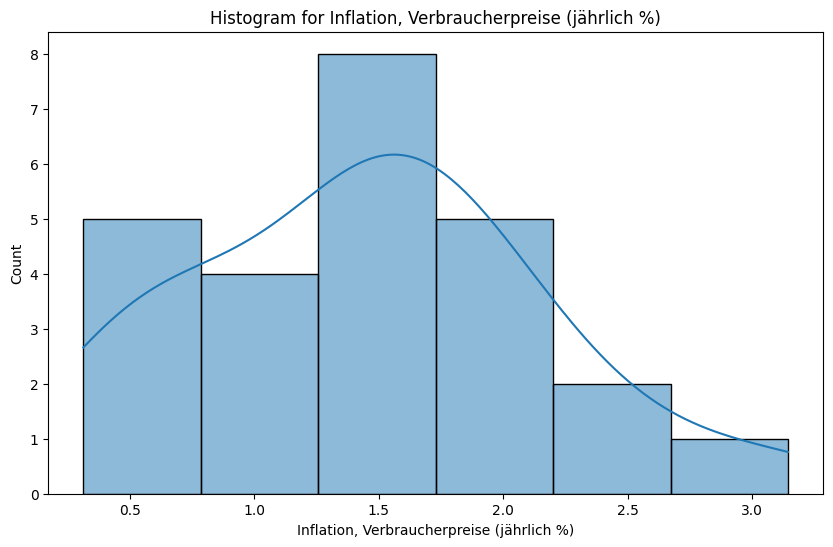

Shapiro-Wilk-Test for Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP): Statistic=0.9690558910369873, p-Value=0.6212263107299805


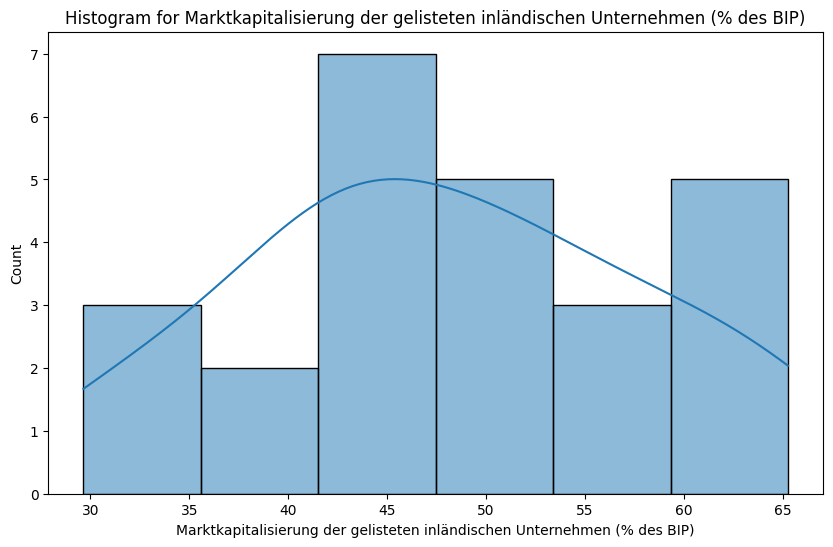

Shapiro-Wilk-Test for Realer effektiver Wechselkursindex (2010 = 100): Statistic=0.936481237411499, p-Value=0.12273538112640381


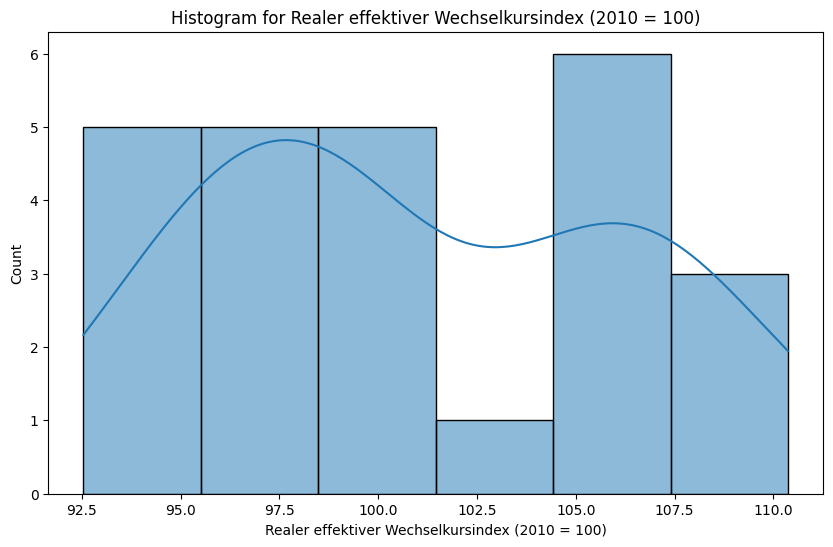

Shapiro-Wilk-Test for Wirtschaftswachstum (jährlich %): Statistic=0.8321334719657898, p-Value=0.000821719819214195


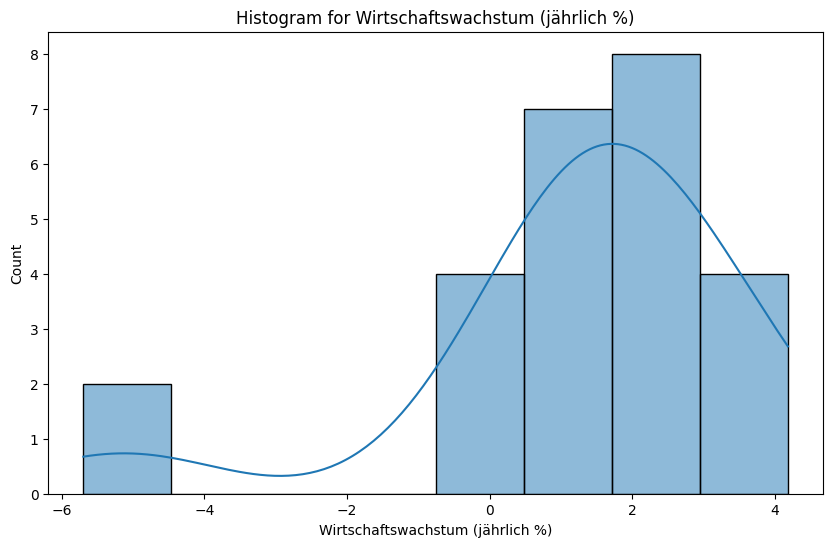

Shapiro-Wilk-Test for Bruttoanlageinvestitionen (% des BIP): Statistic=0.8993144631385803, p-Value=0.017726970836520195


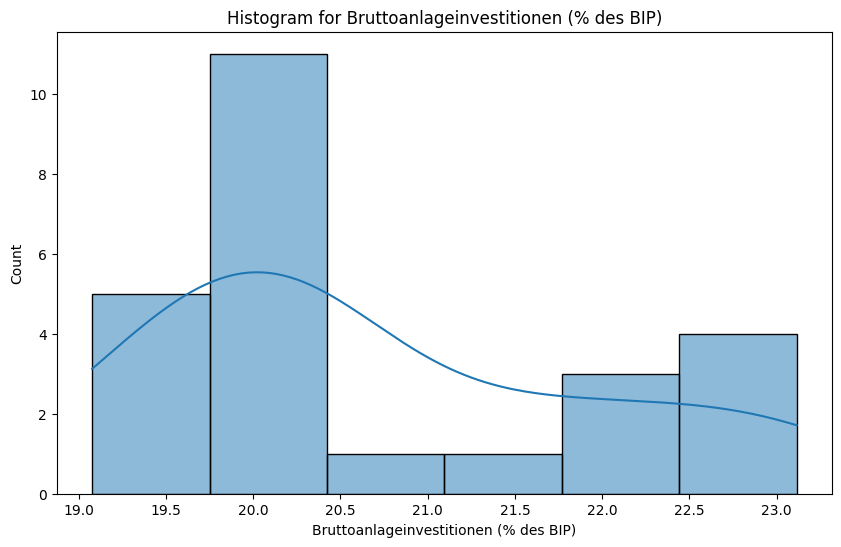

Shapiro-Wilk-Test for Persönliche Überweisungen (aktuelle US$): Statistic=0.955777108669281, p-Value=0.3367990255355835


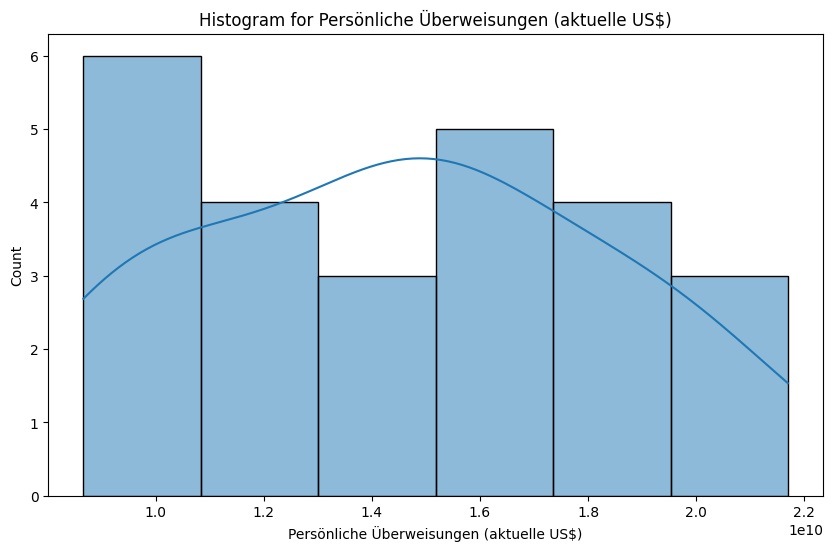

Shapiro-Wilk-Test for Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$): Statistic=0.9508910179138184, p-Value=0.26256710290908813


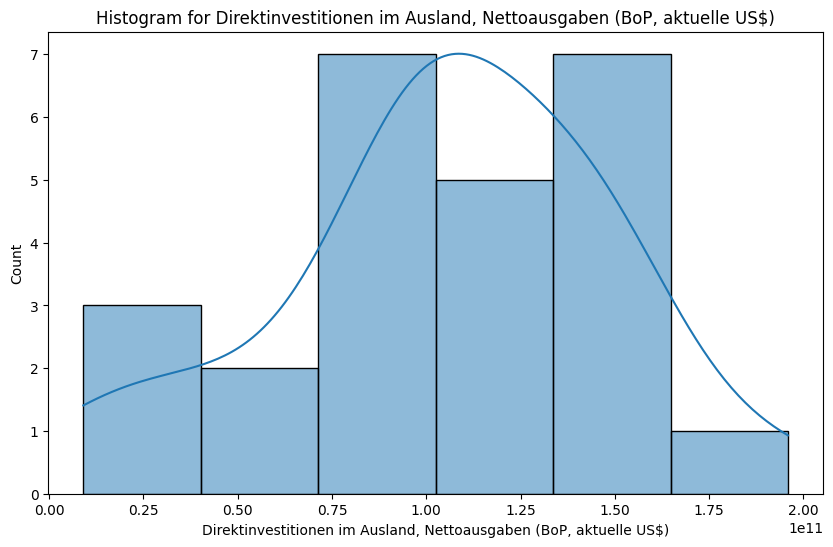

In [26]:


# Perform the Shapiro-Wilk normality test
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        stat, p_value = shapiro(df[col].dropna())
        print(f'Shapiro-Wilk Test for {col}: Statistic={stat:.4f}, p-value={p_value:.4f}')

        alpha = 0.05
        if p_value > alpha:
            print(f'{col} appears to be normally distributed (fail to reject H0)\n')
        else:
            print(f'{col} does not appear to be normally distributed (reject H0)\n')


#             # The value α (alpha) is a critical threshold used in hypothesis testing to determine whether to reject the null hypothesis.
#             # It represents the level of significance or the probability of making a Type I error.
#             # In the context of a normality test, such as the Shapiro-Wilk test in the previous example, the null hypothesis (H0) is that the sample follows a normal distribution.
#             # If the resulting p-value from the test is less than the chosen α value, you reject the null hypothesis.
#             # A common value for α is 0.05, indicating a willingness to accept a 5% probability of making a Type I error (incorrectly rejecting a true null hypothesis). 
#             # However, the α value can be adjusted based on the nature of the study and the implications of errors. 
#             #If the tolerance for Type I errors is lower, you might choose a lower α value, such as 0.01.

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Shapiro-Wilk-Test
for col in df.columns[1:]:
    # Ignore NaN values for this test
    data = df[col].dropna()
    stat, p = stats.shapiro(data)
    print(f"Shapiro-Wilk-Test for {col}: Statistic={stat}, p-Value={p}")
    
    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True)
    plt.title(f"Histogram for {col}")
    plt.show()



15. Check the correlation using Seaborn and Klib libraries.

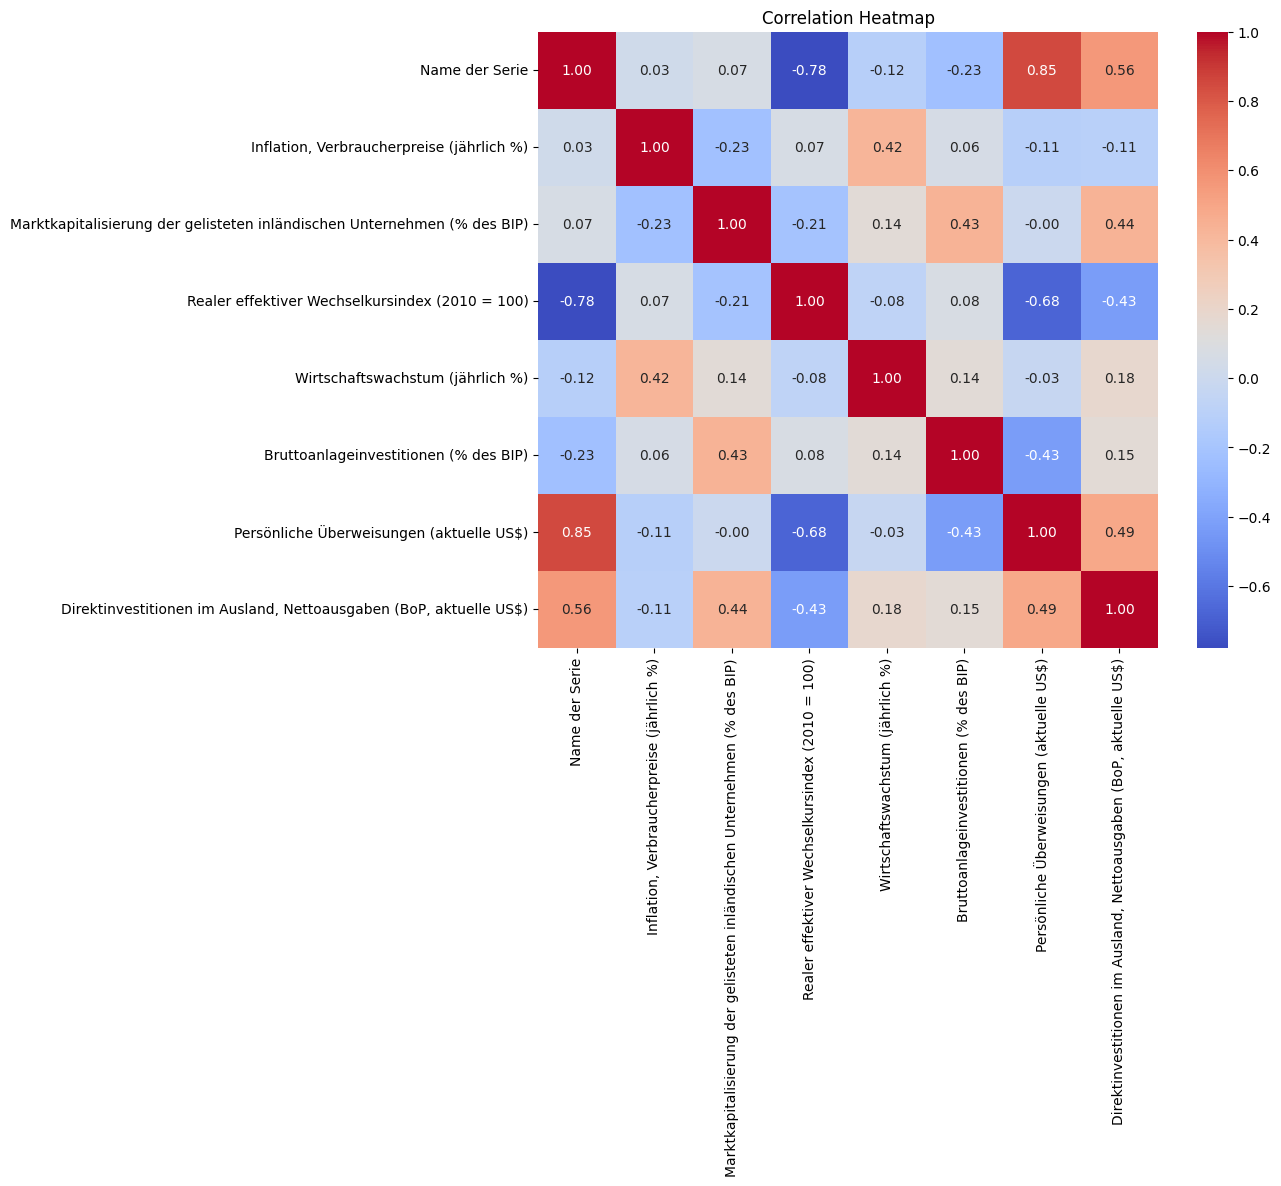

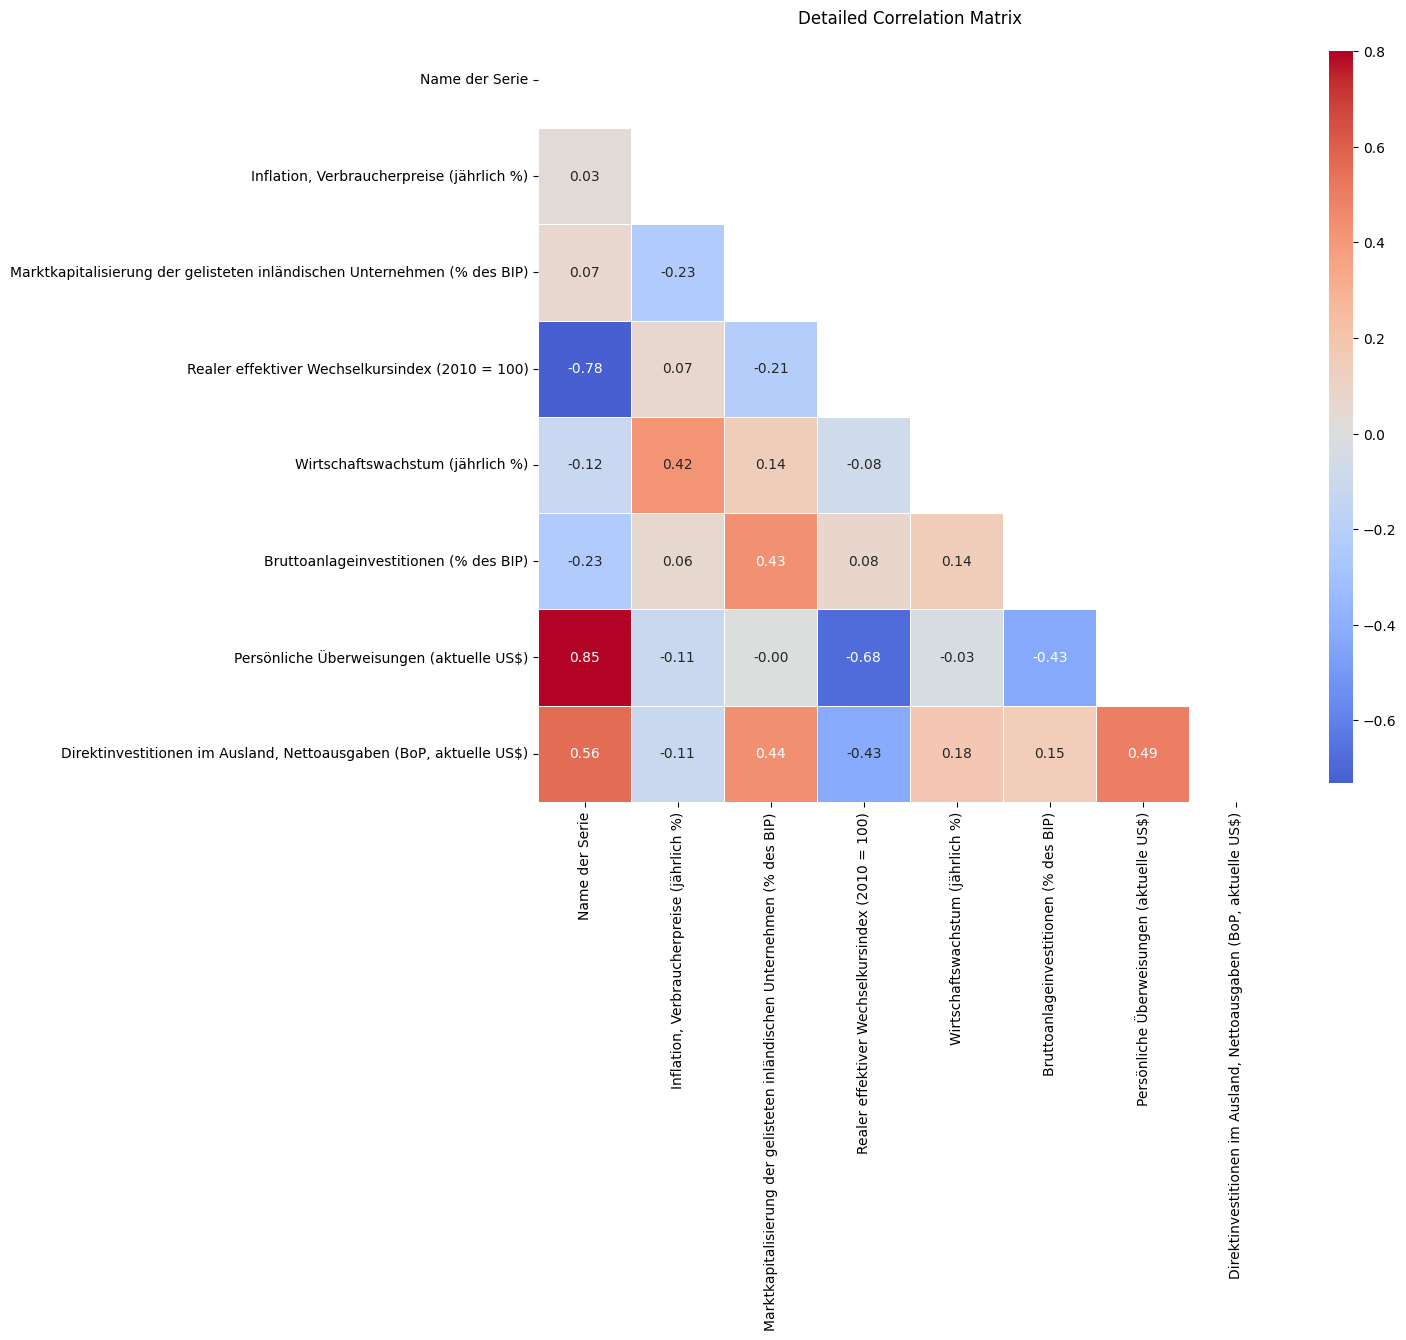

In [27]:
# Assuming 'df' is the name of your DataFrame
# First, use Seaborn to create a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Now, use Klib to get a detailed correlation matrix
klib.corr_plot(df, target=None, cmap='coolwarm', annot=True)
plt.title('Detailed Correlation Matrix')
plt.show()


16. Split the dataset.
17. Train and test the set with Test_size = 0.3.

In [31]:
# Assuming 'df' is your DataFrame
X = df[['Inflation, Verbraucherpreise (jährlich %)']]
y = df[['Marktkapitalisierung der gelisteten inländischen Unternehmen (% des BIP)',
        'Realer effektiver Wechselkursindex (2010 = 100)',
        'Wirtschaftswachstum (jährlich %)',
        'Bruttoanlageinvestitionen (% des BIP)',
        'Persönliche Überweisungen (aktuelle US$)',
        'Direktinvestitionen im Ausland, Nettoausgaben (BoP, aktuelle US$)']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (17, 1)
X_test shape: (8, 1)
y_train shape: (17, 6)
y_test shape: (8, 6)


18. Execute the model using sklearn: linear regression, knn-regression.

In [34]:
#linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
linear_predictions = linear_model.predict(X_test)

# Evaluate the model
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)

print("Linear Regression Mean Squared Error:", linear_mse)
print("Linear Regression R^2 Score:", linear_r2)


Linear Regression Mean Squared Error: 1.66231362140543e+20
Linear Regression R^2 Score: -0.2033325247564232


In [36]:
#KNN
from sklearn.neighbors import KNeighborsRegressor

# Create k-NN regression model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the model
knn_model.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn_model.predict(X_test)

# Evaluate the model
knn_mse = mean_squared_error(y_test, knn_predictions)
knn_r2 = r2_score(y_test, knn_predictions)

print("k-NN Regression Mean Squared Error:", knn_mse)
print("k-NN Regression R^2 Score:", knn_r2)


k-NN Regression Mean Squared Error: 1.214940612216421e+20
k-NN Regression R^2 Score: -0.16104737608617692


19. Plot the actual value and the predicted value.

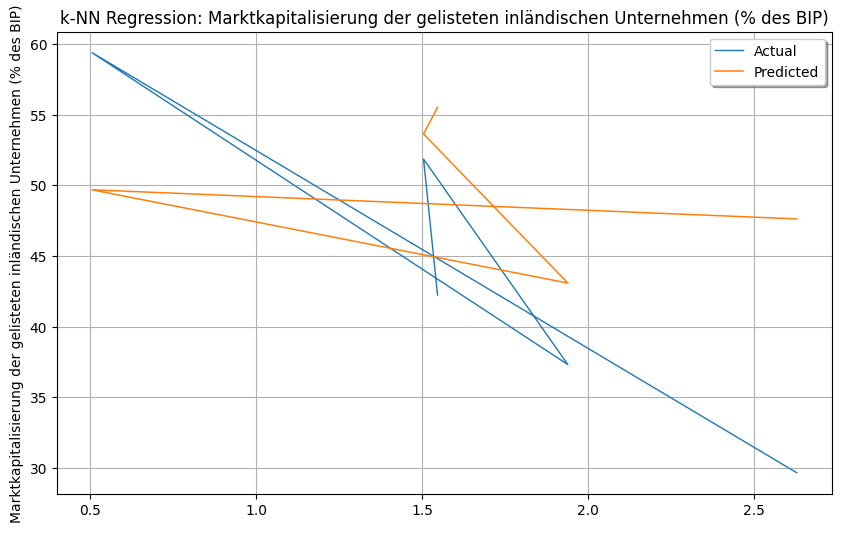

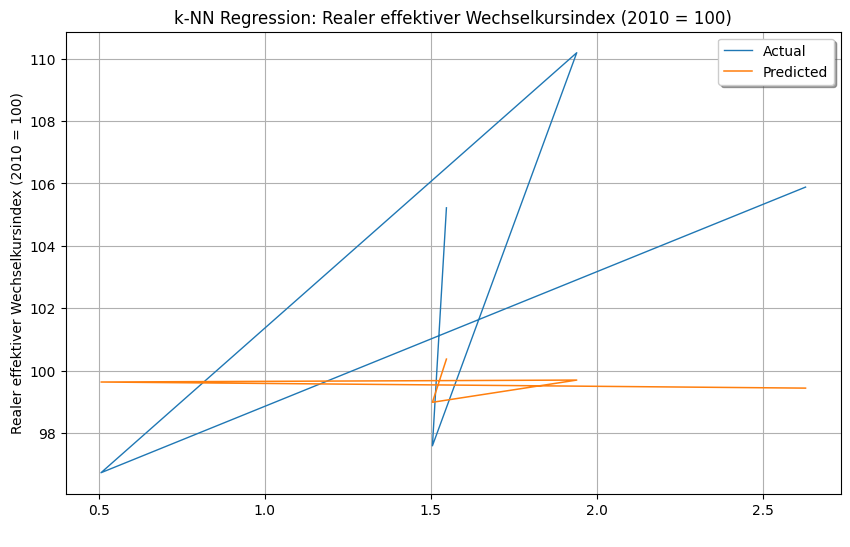

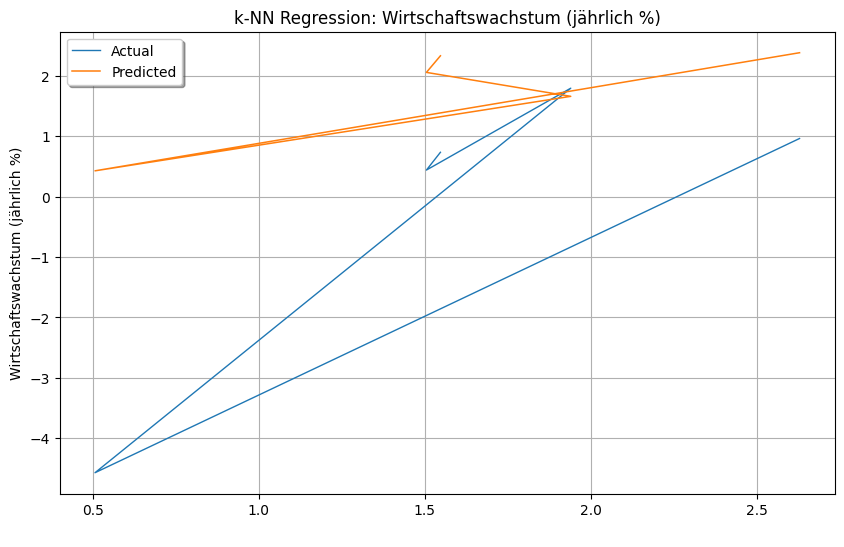

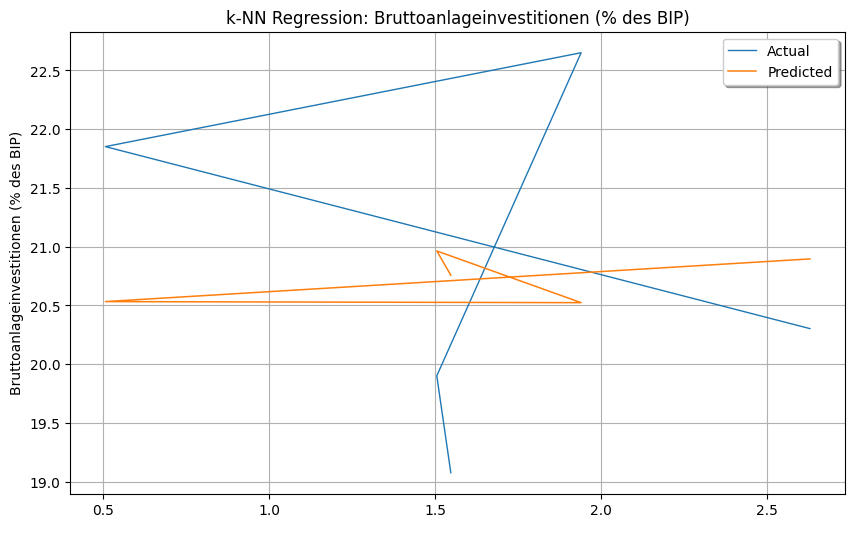

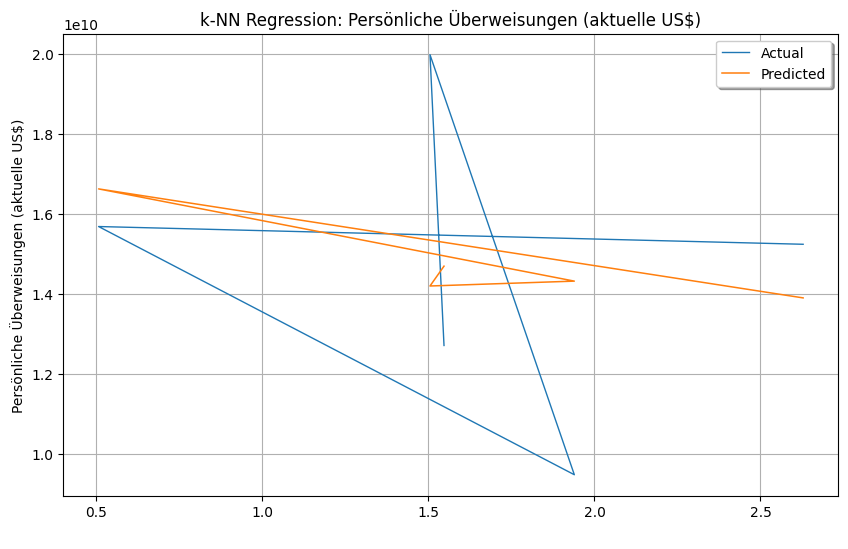

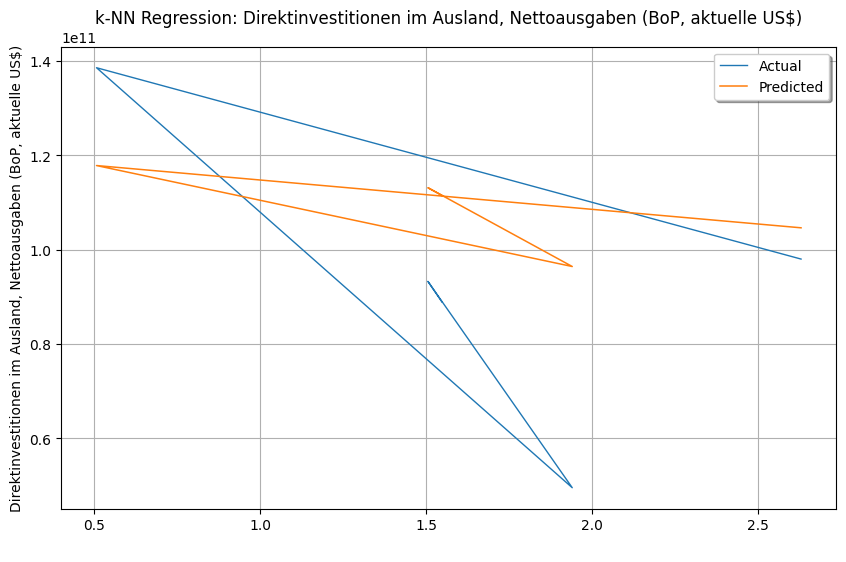

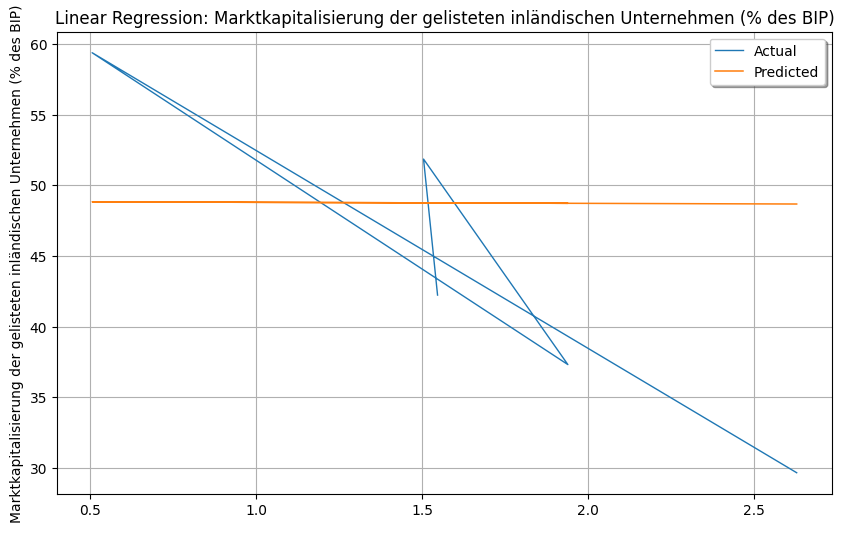

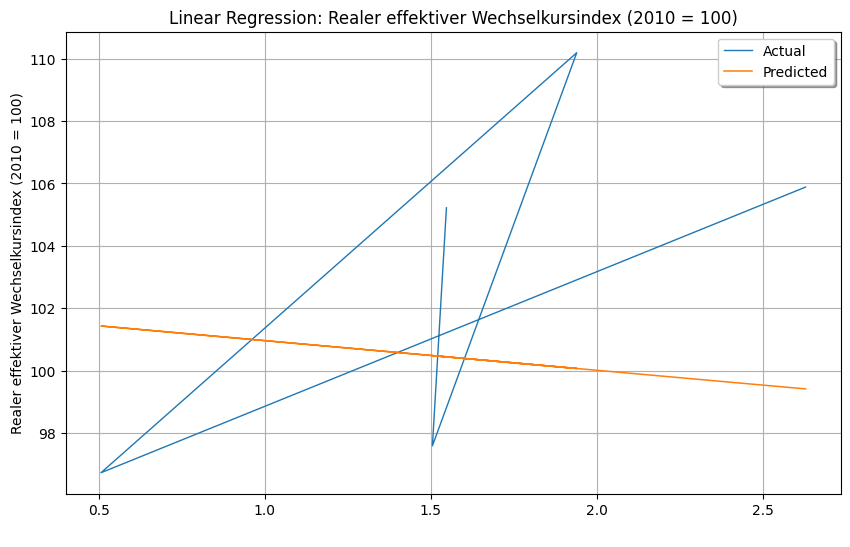

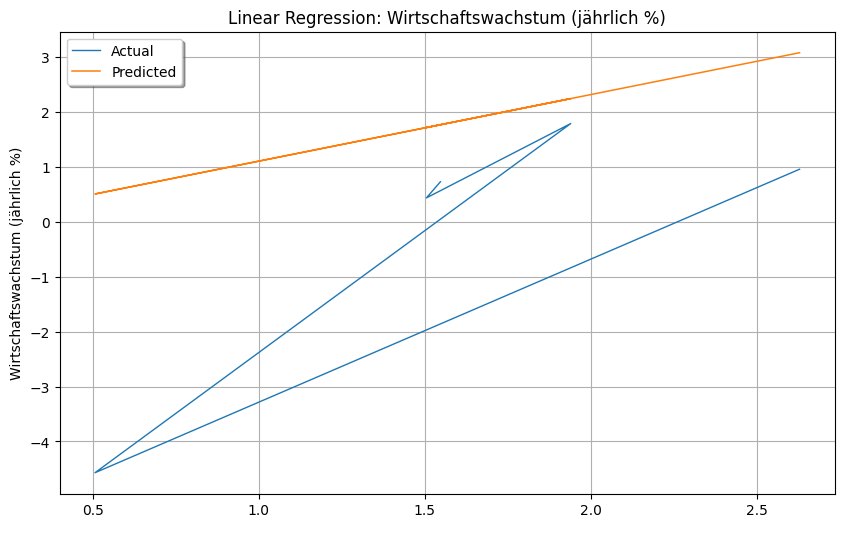

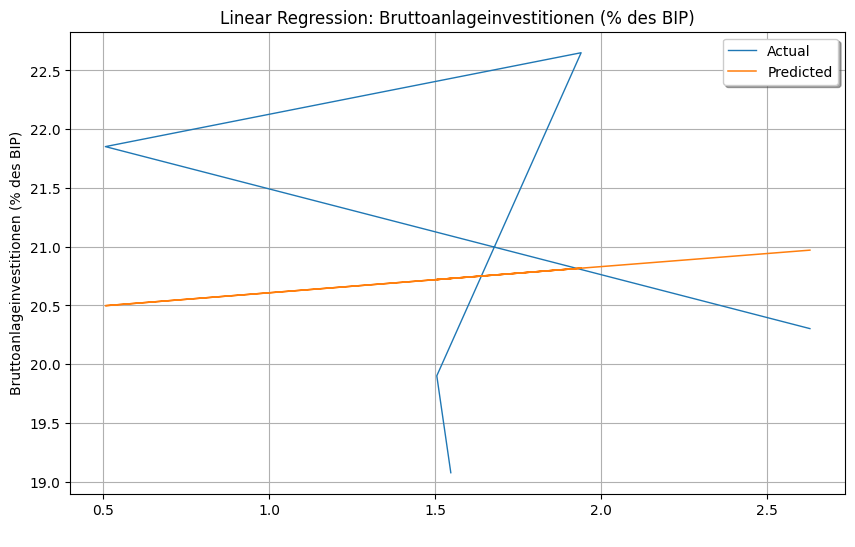

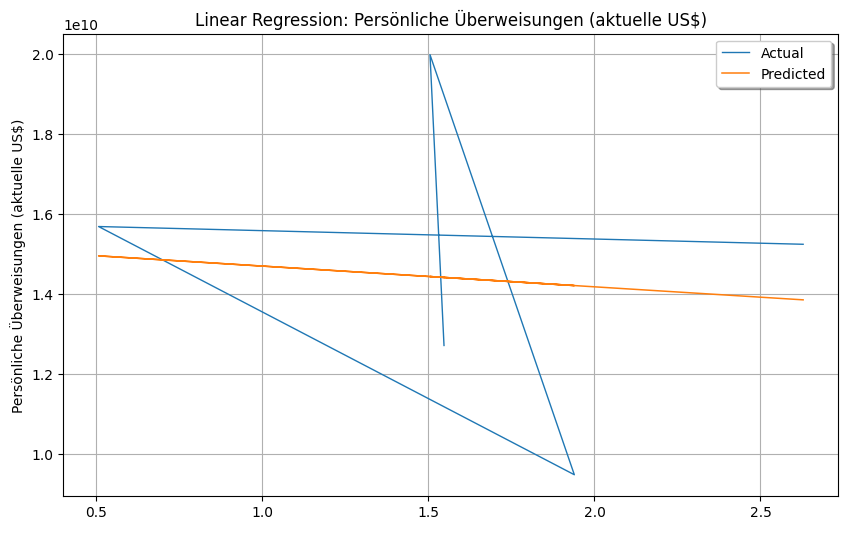

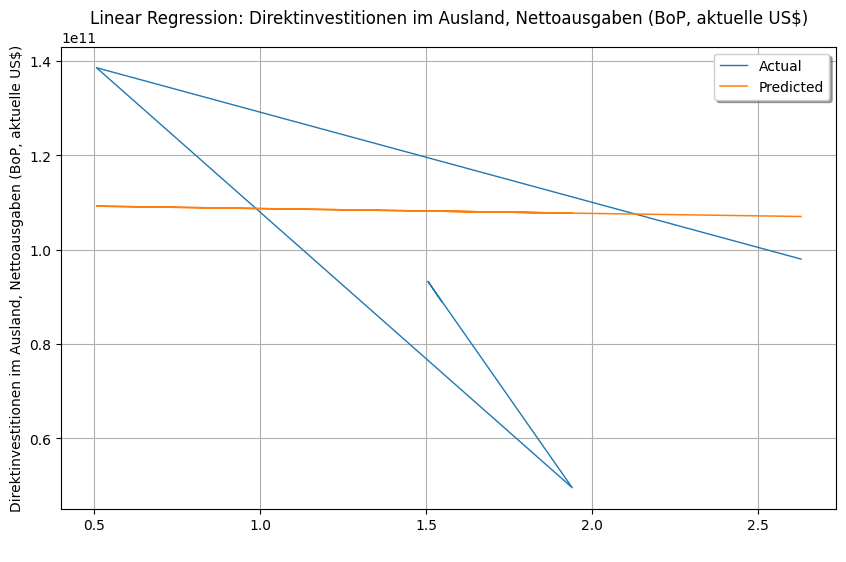

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting for k-NN Regression
for col_idx, col_name in enumerate(y_test.columns):
    plt.figure(figsize=(10, 6))
    
    plt.plot(X_test, y_test[col_name], label="Actual", linewidth=1)
    plt.plot(X_test, knn_predictions[:, col_idx], label="Predicted", linewidth=1.1)
    
    plt.title(f"k-NN Regression: {col_name}")
    plt.xlabel(' ')
    plt.ylabel(col_name)
    
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()

# Plotting for Linear Regression
for col_idx, col_name in enumerate(y_test.columns):
    plt.figure(figsize=(10, 6))
    
    plt.plot(X_test, y_test[col_name], label="Actual", linewidth=1)
    plt.plot(X_test, linear_predictions[:, col_idx], label="Predicted", linewidth=1.1)
    
    plt.title(f"Linear Regression: {col_name}")
    plt.xlabel(' ')
    plt.ylabel(col_name)
    
    plt.legend(loc='best', fancybox=True, shadow=True)
    plt.grid(True)
    plt.show()
